<a href="https://colab.research.google.com/github/Ishakasar/Taxi-Trip-Prediction/blob/main/Isha_Kasar_Team_3_Capstone_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

In [4]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary df is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 1/NYC Taxi Data.csv')

In [7]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [9]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [10]:
df['trip_duration'].value_counts()

368      1624
408      1584
348      1582
367      1581
358      1577
         ... 
85305       1
83256       1
83884       1
6419        1
8522        1
Name: trip_duration, Length: 7417, dtype: int64

In [11]:
df['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [12]:
df['vendor_id'].value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

In [13]:
df[df.duplicated()]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2613: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  color=hist_color, **hist_kws)


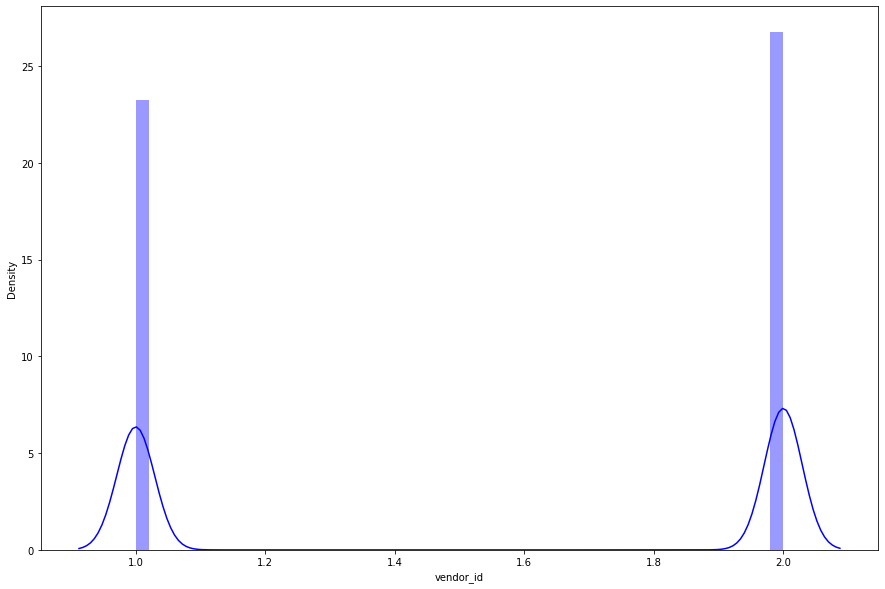

In [14]:
plt.figure(figsize=(15,10))
sns.distplot(df['vendor_id'	],color="B")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


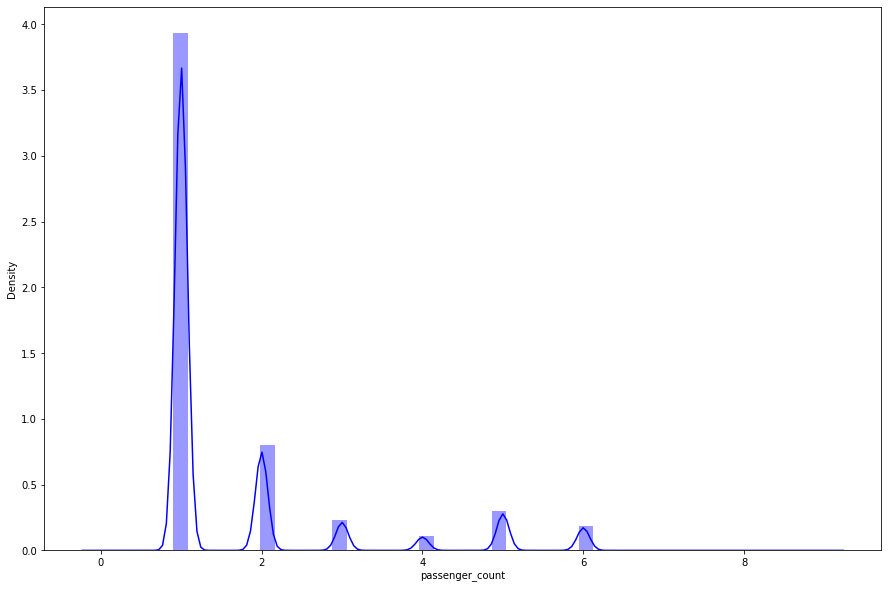

In [15]:
plt.figure(figsize=(15,10))
sns.distplot(df['passenger_count'	],color="B")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


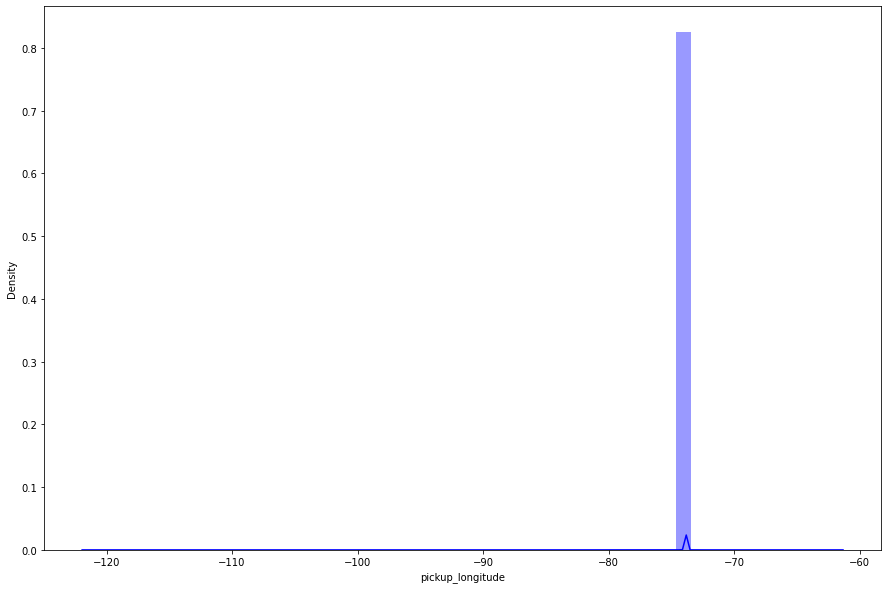

In [16]:
plt.figure(figsize=(15,10))
sns.distplot(df['pickup_longitude'	],color="B")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


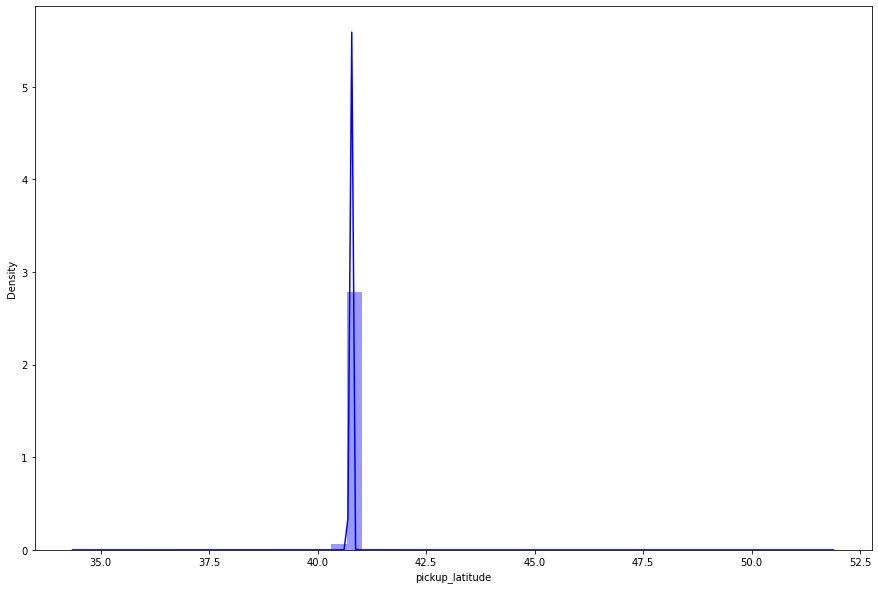

In [17]:
plt.figure(figsize=(15,10))
sns.distplot(df['pickup_latitude'	],color="B")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


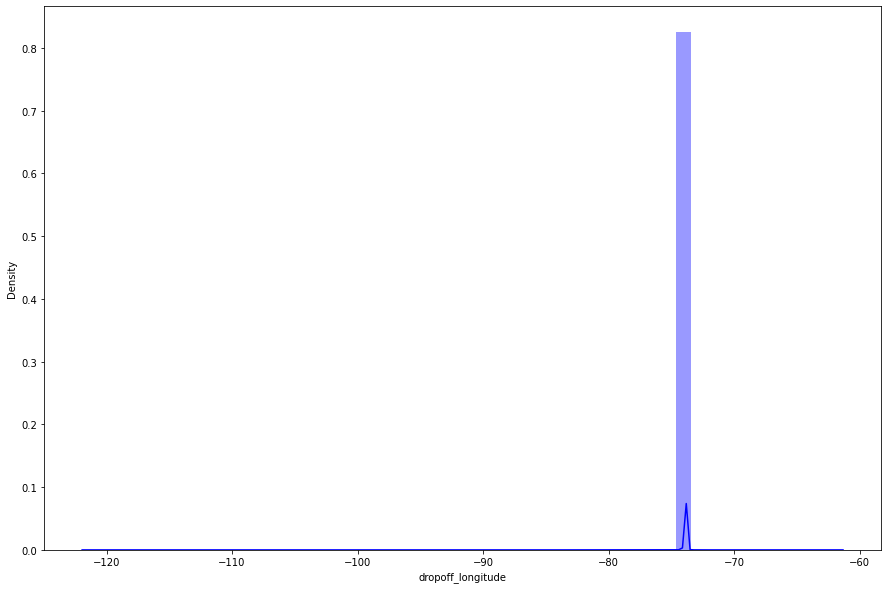

In [18]:
plt.figure(figsize=(15,10))
sns.distplot(df['dropoff_longitude'	],color="B")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


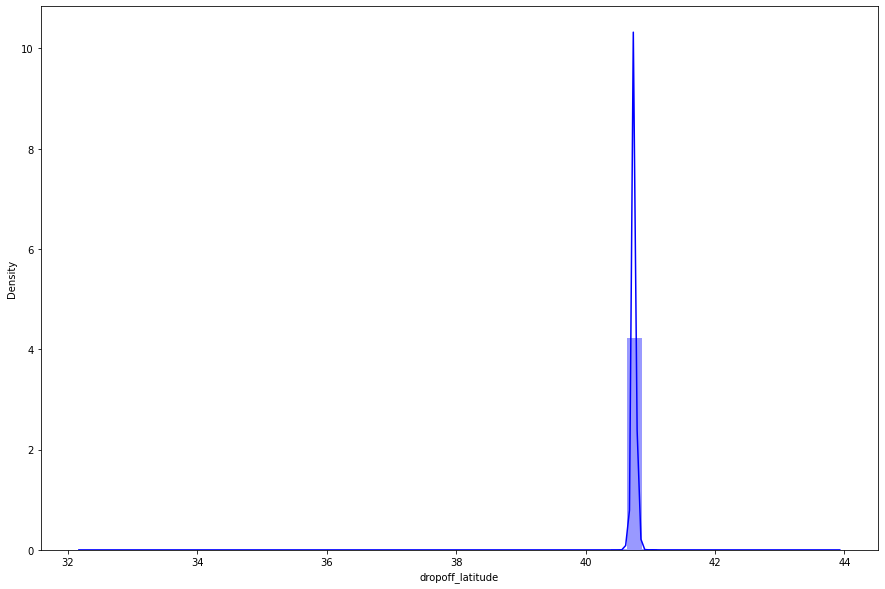

In [19]:
plt.figure(figsize=(15,10))
sns.distplot(df['dropoff_latitude'	],color="B")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


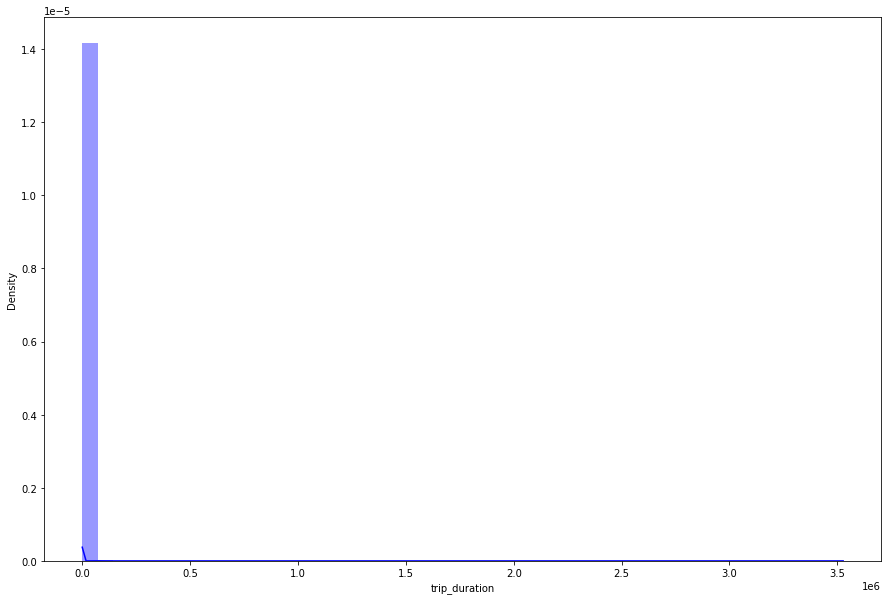

In [20]:
plt.figure(figsize=(15,10))
sns.distplot(df['trip_duration'	],color="B")

##Making new features

In [21]:
from math import sin, cos, sqrt, atan2, radians

def get_distance(lon_1, lon_2, lat_1, lat_2):

    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat_1)
    lon1 = radians(lon_1)
    lat2 = radians(lat_2)
    lon2 = radians(lon_2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance

In [22]:
df["Travel_distance"] = df.apply(lambda x: get_distance(x["pickup_longitude"],x["dropoff_longitude"],x["pickup_latitude"],x["dropoff_latitude"]),axis=1)

In [23]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"], format="%Y-%m-%d %H:%M:%S")

In [24]:
df['Day']=df['pickup_datetime'].dt.day_name()

In [25]:
df["pick_year"] = df["pickup_datetime"].apply(lambda x: x.year)
df["pick_month"] = df["pickup_datetime"].apply(lambda x: x.month)
df["pick_day_num"] = df["pickup_datetime"].apply(lambda x: x.day)
df["pick_hour"] = df["pickup_datetime"].apply(lambda x: x.hour)
df["pick_minute"] = df["pickup_datetime"].apply(lambda x: x.minute)

In [26]:
df["dropoff_datetime"] = pd.to_datetime(df["pickup_datetime"], format="%Y-%m-%d %H:%M:%S")
df["drop_year"] = df["dropoff_datetime"].apply(lambda x: x.year)
df["drop_month"] = df["dropoff_datetime"].apply(lambda x: x.month)
df["drop_day_num"] = df["dropoff_datetime"].apply(lambda x: x.day)
df["drop_hour"] = df["dropoff_datetime"].apply(lambda x: x.hour)
df["drop_minute"] = df["dropoff_datetime"].apply(lambda x: x.minute)

In [27]:
df['pick_Day']=df['pickup_datetime'].dt.day_name()

In [28]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Travel_distance,Day,pick_year,pick_month,pick_day_num,pick_hour,pick_minute,drop_year,drop_month,drop_day_num,drop_hour,drop_minute,pick_Day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498991,Monday,2016,3,14,17,24,2016,3,14,17,24,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.806074,Sunday,2016,6,12,0,43,2016,6,12,0,43,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.387103,Tuesday,2016,1,19,11,35,2016,1,19,11,35,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485965,Wednesday,2016,4,6,19,32,2016,4,6,19,32,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188962,Saturday,2016,3,26,13,30,2016,3,26,13,30,Saturday


In [29]:
df['pick_month'].value_counts()

3    256189
4    251645
5    248487
2    238300
6    234316
1    229707
Name: pick_month, dtype: int64

In [30]:
df['pick_hour'].value_counts()

18    90600
19    90308
21    84185
20    84072
22    80492
17    76483
14    74292
12    71873
15    71811
13    71473
23    69785
11    68476
9     67663
8     67053
10    65437
16    64313
7     55600
0     53248
1     38571
6     33248
2     27972
3     20895
4     15792
5     15002
Name: pick_hour, dtype: int64

In [31]:
df['Day'].value_counts()

Friday       223533
Saturday     220868
Thursday     218574
Wednesday    210136
Tuesday      202749
Sunday       195366
Monday       187418
Name: Day, dtype: int64

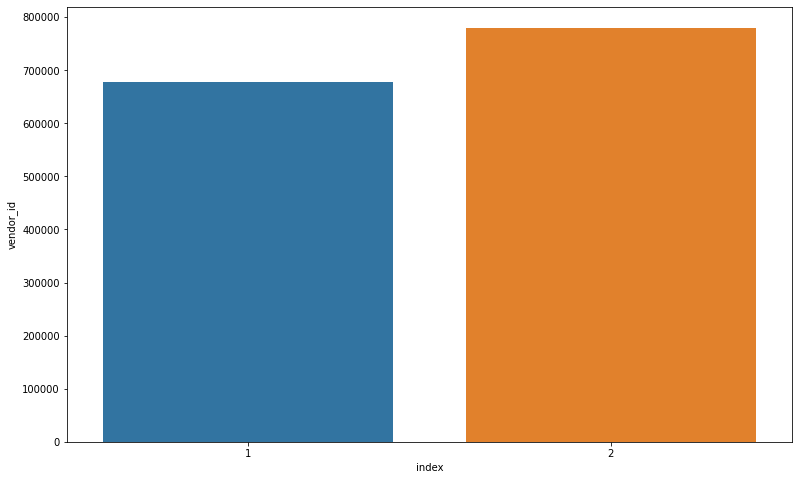

In [32]:
vendor_df=df['vendor_id'].value_counts().reset_index()
plt.figure(figsize=(13,8))
sns.barplot(x='index',y='vendor_id',data=vendor_df)

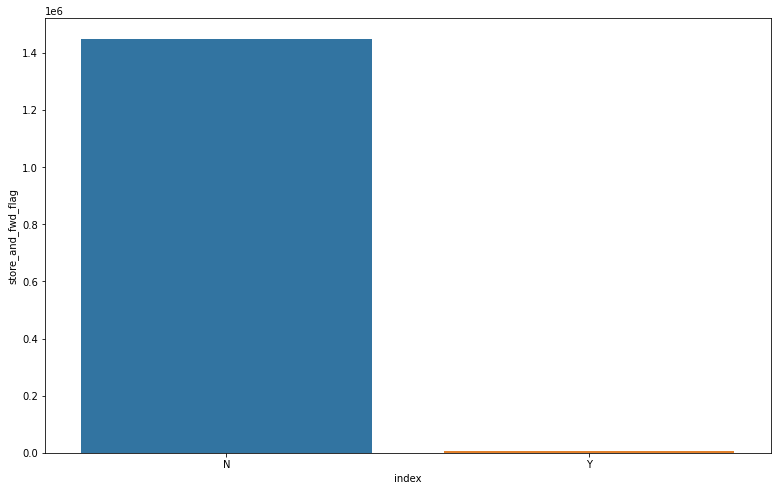

In [33]:
store_and_fwd_flag_df=df['store_and_fwd_flag'].value_counts().reset_index()
plt.figure(figsize=(13,8))
sns.barplot(x='index',y='store_and_fwd_flag',data=store_and_fwd_flag_df)

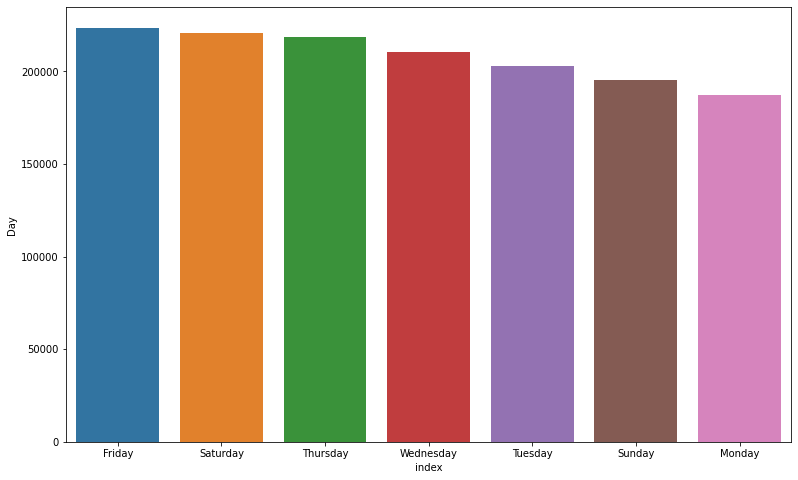

In [34]:
Day_df=df['Day'].value_counts().reset_index()
plt.figure(figsize=(13,8))
sns.barplot(x='index',y='Day',data=Day_df)

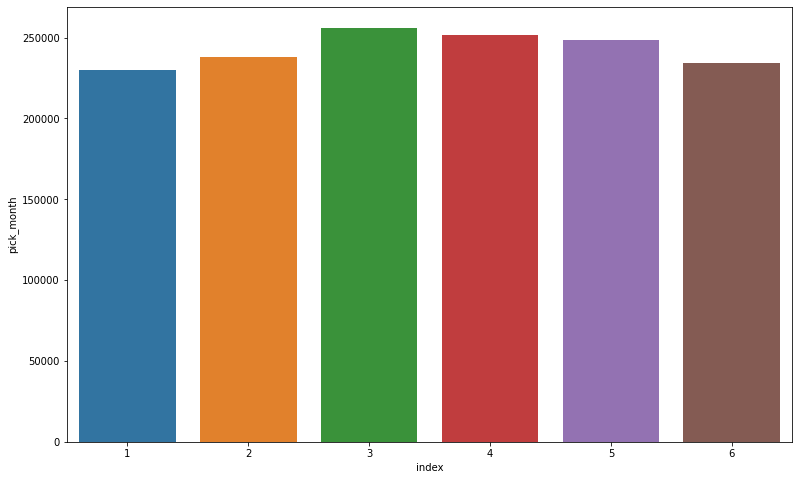

In [35]:
month_df=df['pick_month'].value_counts().reset_index()
plt.figure(figsize=(13,8))
sns.barplot(x='index',y='pick_month',data=month_df)

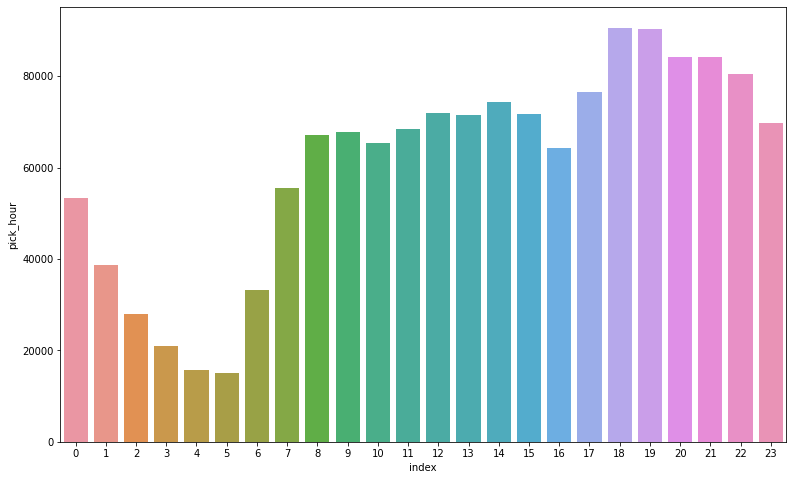

In [36]:
hour_df=df['pick_hour'].value_counts().reset_index()
plt.figure(figsize=(13,8))
sns.barplot(x='index',y='pick_hour',data=hour_df)

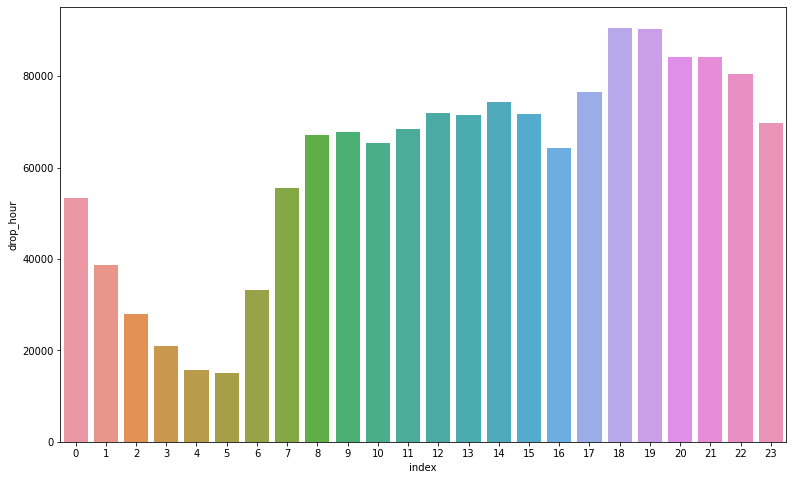

In [37]:
hour_df=df['drop_hour'].value_counts().reset_index()
plt.figure(figsize=(13,8))
sns.barplot(x='index',y='drop_hour',data=hour_df)

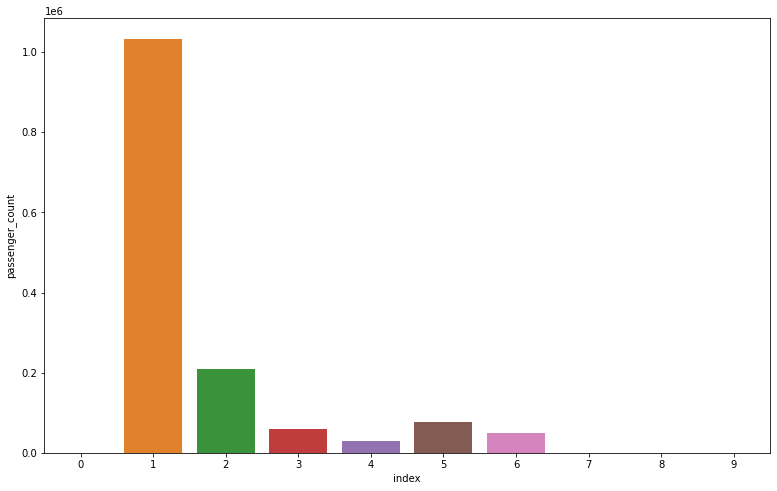

In [38]:
passenger_count_df=df['passenger_count'].value_counts().reset_index()
plt.figure(figsize=(13,8))
sns.barplot(x='index',y='passenger_count',data=passenger_count_df)

In [39]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'Travel_distance', 'Day', 'pick_year', 'pick_month',
       'pick_day_num', 'pick_hour', 'pick_minute', 'drop_year', 'drop_month',
       'drop_day_num', 'drop_hour', 'drop_minute', 'pick_Day'],
      dtype='object')

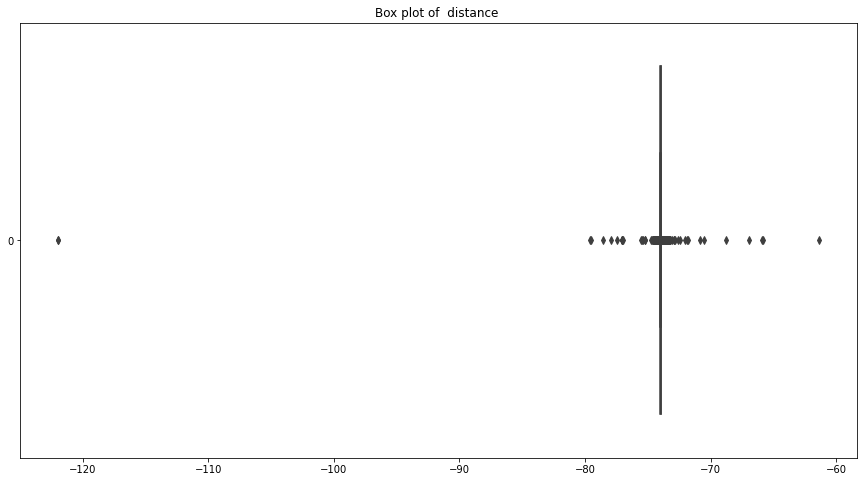

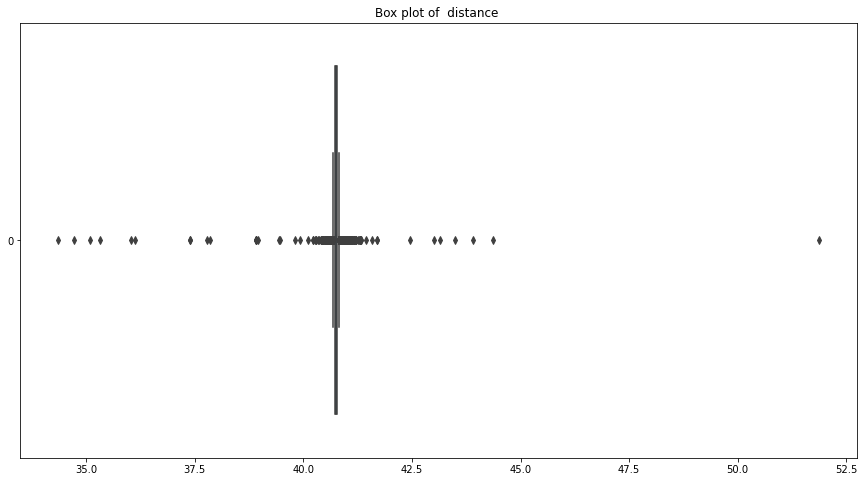

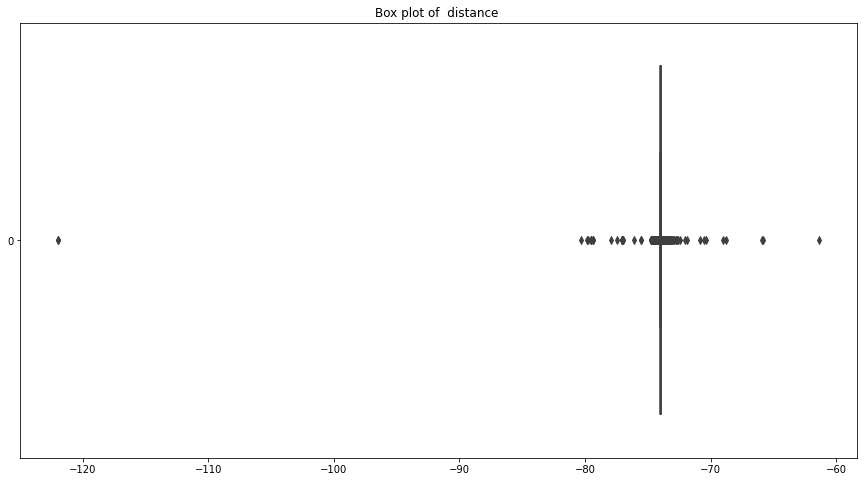

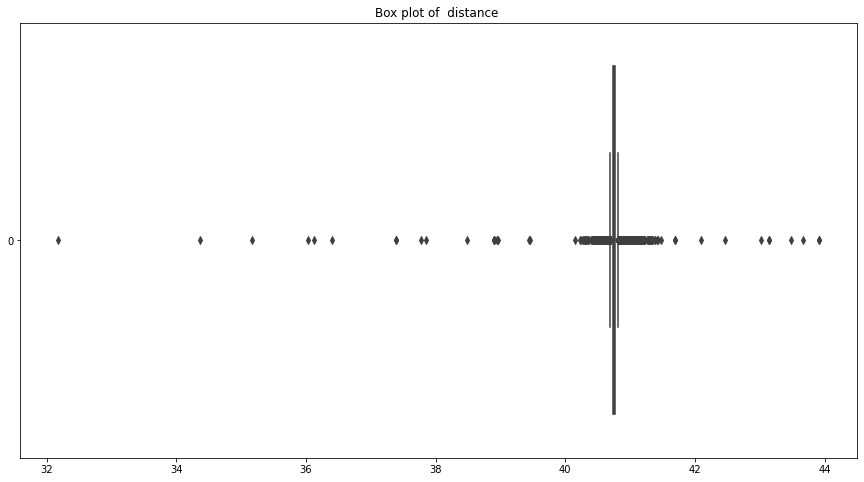

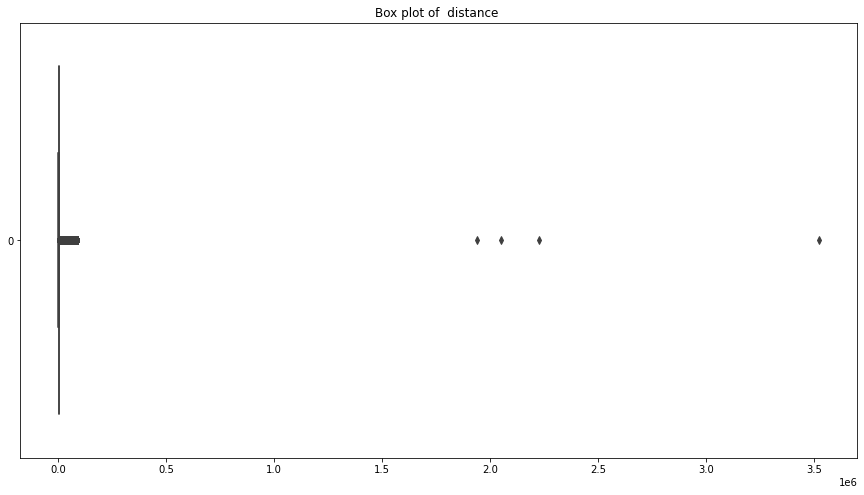

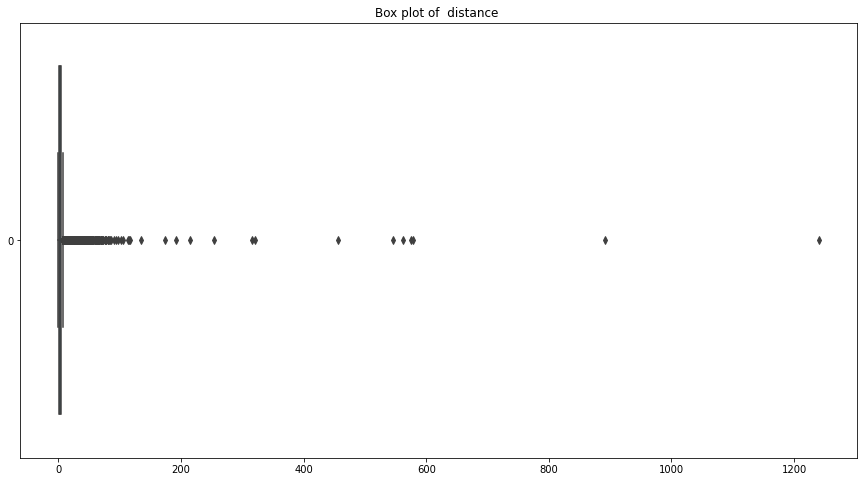

In [40]:
box_df = pd.DataFrame(data = df, columns = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude',
       'trip_duration', 'Travel_distance',  
       ])
for col in box_df.columns:
  plt.figure(figsize=(15,8))
  plt.title("Box plot of  distance ")
  ax = sns.boxplot(data=box_df[col],orient='h')


In [41]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,Travel_distance,pick_year,pick_month,pick_day_num,pick_hour,pick_minute,drop_year,drop_month,drop_day_num,drop_hour,drop_minute
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1458644.0,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1458644.0,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02,3.441944e+00,2016.0,3.516818e+00,1.550402e+01,1.360648e+01,2.959016e+01,2016.0,3.516818e+00,1.550402e+01,1.360648e+01,2.959016e+01
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03,4.297887e+00,0.0,1.681038e+00,8.703135e+00,6.399693e+00,1.732471e+01,0.0,1.681038e+00,8.703135e+00,6.399693e+00,1.732471e+01
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00,0.000000e+00,2016.0,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2016.0,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02,1.232223e+00,2016.0,2.000000e+00,8.000000e+00,9.000000e+00,1.500000e+01,2016.0,2.000000e+00,8.000000e+00,9.000000e+00,1.500000e+01
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02,2.094374e+00,2016.0,4.000000e+00,1.500000e+01,1.400000e+01,3.000000e+01,2016.0,4.000000e+00,1.500000e+01,1.400000e+01,3.000000e+01
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03,3.876554e+00,2016.0,5.000000e+00,2.300000e+01,1.900000e+01,4.500000e+01,2016.0,5.000000e+00,2.300000e+01,1.900000e+01,4.500000e+01
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06,1.241298e+03,2016.0,6.000000e+00,3.100000e+01,2.300000e+01,5.900000e+01,2016.0,6.000000e+00,3.100000e+01,2.300000e+01,5.900000e+01


#Remove outliers based on trip duration and travel distance

In [42]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,Travel_distance,pick_year,pick_month,pick_day_num,pick_hour,pick_minute,drop_year,drop_month,drop_day_num,drop_hour,drop_minute
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1458644.0,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1458644.0,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02,3.441944e+00,2016.0,3.516818e+00,1.550402e+01,1.360648e+01,2.959016e+01,2016.0,3.516818e+00,1.550402e+01,1.360648e+01,2.959016e+01
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03,4.297887e+00,0.0,1.681038e+00,8.703135e+00,6.399693e+00,1.732471e+01,0.0,1.681038e+00,8.703135e+00,6.399693e+00,1.732471e+01
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00,0.000000e+00,2016.0,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2016.0,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02,1.232223e+00,2016.0,2.000000e+00,8.000000e+00,9.000000e+00,1.500000e+01,2016.0,2.000000e+00,8.000000e+00,9.000000e+00,1.500000e+01
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02,2.094374e+00,2016.0,4.000000e+00,1.500000e+01,1.400000e+01,3.000000e+01,2016.0,4.000000e+00,1.500000e+01,1.400000e+01,3.000000e+01
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03,3.876554e+00,2016.0,5.000000e+00,2.300000e+01,1.900000e+01,4.500000e+01,2016.0,5.000000e+00,2.300000e+01,1.900000e+01,4.500000e+01
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06,1.241298e+03,2016.0,6.000000e+00,3.100000e+01,2.300000e+01,5.900000e+01,2016.0,6.000000e+00,3.100000e+01,2.300000e+01,5.900000e+01


In [43]:
df.shape

(1458644, 24)

#Travel dist 0 means no trip

In [44]:
df[df['Travel_distance']<=0.5]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Travel_distance,Day,pick_year,pick_month,pick_day_num,pick_hour,pick_minute,drop_year,drop_month,drop_day_num,drop_hour,drop_minute,pick_Day
72,id1510700,2,2016-02-20 21:58:13,2016-02-20 21:58:13,1,-73.958397,40.772629,-73.955132,40.774242,N,57,0.328436,Saturday,2016,2,20,21,58,2016,2,20,21,58,Saturday
127,id2209089,1,2016-02-24 22:56:43,2016-02-24 22:56:43,1,-74.006912,40.730362,-74.005943,40.727070,N,416,0.375175,Wednesday,2016,2,24,22,56,2016,2,24,22,56,Wednesday
246,id3487442,2,2016-02-29 18:39:12,2016-02-29 18:39:12,1,-73.981819,40.768963,-73.981819,40.768963,N,227,0.000000,Monday,2016,2,29,18,39,2016,2,29,18,39,Monday
251,id0171820,2,2016-05-25 06:40:04,2016-05-25 06:40:04,1,-74.004524,40.724194,-74.004494,40.724667,N,189,0.052677,Wednesday,2016,5,25,6,40,2016,5,25,6,40,Wednesday
269,id0747713,2,2016-01-17 03:24:53,2016-01-17 03:24:53,1,-74.006691,40.737640,-74.003883,40.738091,N,156,0.241863,Sunday,2016,1,17,3,24,2016,1,17,3,24,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458438,id2559393,1,2016-05-28 21:37:09,2016-05-28 21:37:09,1,-73.969505,40.757195,-73.965706,40.754257,N,219,0.457412,Saturday,2016,5,28,21,37,2016,5,28,21,37,Saturday
1458539,id3985942,1,2016-06-03 07:41:14,2016-06-03 07:41:14,1,-73.957047,40.774696,-73.959740,40.778294,N,167,0.459954,Friday,2016,6,3,7,41,2016,6,3,7,41,Friday
1458544,id3958653,1,2016-06-16 15:10:11,2016-06-16 15:10:11,1,-73.956459,40.767231,-73.956589,40.767269,N,38,0.011721,Thursday,2016,6,16,15,10,2016,6,16,15,10,Thursday
1458551,id3517858,1,2016-05-10 07:13:21,2016-05-10 07:13:21,1,-73.975151,40.752602,-73.971947,40.754333,N,185,0.331672,Tuesday,2016,5,10,7,13,2016,5,10,7,13,Tuesday


In [45]:
#df.drop(df.loc[df['Travel_distance']<=0.5].index, inplace=True)


In [46]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'Travel_distance', 'Day', 'pick_year', 'pick_month',
       'pick_day_num', 'pick_hour', 'pick_minute', 'drop_year', 'drop_month',
       'drop_day_num', 'drop_hour', 'drop_minute', 'pick_Day'],
      dtype='object')

In [47]:
def Peak(hour):
    if hour.item()>=7 and hour.item()<=9:
        return 'morning_peak_hour(7-9)'
    elif hour.item()>9 and hour.item()<16:
        return 'non_peak_hour_afternoon(9-16)'
    elif hour.item()>=16 and hour.item()<=19:
        return 'peak_hour_eve(16-19)'
    elif hour.item()>19 and hour.item()<=23:
        return 'non_peak_hour_eve(19-23)'
    else:
        return 'late_night(23 onwards)'
df['pick_hour']=df[['pick_hour']].apply(Peak, axis=1)
df['drop_hour']=df[['drop_hour']].apply(Peak, axis=1)

In [48]:
df = pd.get_dummies(df, columns=["pick_hour"])
df = pd.get_dummies(df, columns=["drop_hour"])

In [49]:
df.head(15)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Travel_distance,Day,pick_year,pick_month,pick_day_num,pick_minute,drop_year,drop_month,drop_day_num,drop_minute,pick_Day,pick_hour_late_night(23 onwards),pick_hour_morning_peak_hour(7-9),pick_hour_non_peak_hour_afternoon(9-16),pick_hour_non_peak_hour_eve(19-23),pick_hour_peak_hour_eve(16-19),drop_hour_late_night(23 onwards),drop_hour_morning_peak_hour(7-9),drop_hour_non_peak_hour_afternoon(9-16),drop_hour_non_peak_hour_eve(19-23),drop_hour_peak_hour_eve(16-19)
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498991,Monday,2016,3,14,24,2016,3,14,24,Monday,0,0,0,0,1,0,0,0,0,1
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.806074,Sunday,2016,6,12,43,2016,6,12,43,Sunday,1,0,0,0,0,1,0,0,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.387103,Tuesday,2016,1,19,35,2016,1,19,35,Tuesday,0,0,1,0,0,0,0,1,0,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485965,Wednesday,2016,4,6,32,2016,4,6,32,Wednesday,0,0,0,0,1,0,0,0,0,1
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188962,Saturday,2016,3,26,30,2016,3,26,30,Saturday,0,0,1,0,0,0,0,1,0,0
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:01:40,6,-73.982857,40.742195,-73.992081,40.749184,N,443,1.099287,Saturday,2016,1,30,1,2016,1,30,1,Saturday,0,0,0,1,0,0,0,0,1,0
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:34:59,4,-73.969017,40.757839,-73.957405,40.765896,N,341,1.326695,Friday,2016,6,17,34,2016,6,17,34,Friday,0,0,0,1,0,0,0,0,1,0
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 07:54:58,1,-73.969276,40.797779,-73.922470,40.760559,N,1551,5.716775,Saturday,2016,5,21,54,2016,5,21,54,Saturday,0,1,0,0,0,0,1,0,0,0
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:12:23,1,-73.999481,40.738400,-73.985786,40.732815,N,255,1.310765,Friday,2016,5,27,12,2016,5,27,12,Friday,0,0,0,1,0,0,0,0,1,0
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 21:45:01,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,5.122769,Thursday,2016,3,10,45,2016,3,10,45,Thursday,0,0,0,1,0,0,0,0,1,0


In [50]:
#convert trip duration to hrs
df['trip_duration']=df['trip_duration']/3600

In [51]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Travel_distance,Day,pick_year,pick_month,pick_day_num,pick_minute,drop_year,drop_month,drop_day_num,drop_minute,pick_Day,pick_hour_late_night(23 onwards),pick_hour_morning_peak_hour(7-9),pick_hour_non_peak_hour_afternoon(9-16),pick_hour_non_peak_hour_eve(19-23),pick_hour_peak_hour_eve(16-19),drop_hour_late_night(23 onwards),drop_hour_morning_peak_hour(7-9),drop_hour_non_peak_hour_afternoon(9-16),drop_hour_non_peak_hour_eve(19-23),drop_hour_peak_hour_eve(16-19)
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,0.126389,1.498991,Monday,2016,3,14,24,2016,3,14,24,Monday,0,0,0,0,1,0,0,0,0,1
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,0.184167,1.806074,Sunday,2016,6,12,43,2016,6,12,43,Sunday,1,0,0,0,0,1,0,0,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,0.590000,6.387103,Tuesday,2016,1,19,35,2016,1,19,35,Tuesday,0,0,1,0,0,0,0,1,0,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,0.119167,1.485965,Wednesday,2016,4,6,32,2016,4,6,32,Wednesday,0,0,0,0,1,0,0,0,0,1
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,0.120833,1.188962,Saturday,2016,3,26,30,2016,3,26,30,Saturday,0,0,1,0,0,0,0,1,0,0


In [52]:
df.shape

(1458644, 32)

In [53]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Travel_distance,Day,pick_year,pick_month,pick_day_num,pick_minute,drop_year,drop_month,drop_day_num,drop_minute,pick_Day,pick_hour_late_night(23 onwards),pick_hour_morning_peak_hour(7-9),pick_hour_non_peak_hour_afternoon(9-16),pick_hour_non_peak_hour_eve(19-23),pick_hour_peak_hour_eve(16-19),drop_hour_late_night(23 onwards),drop_hour_morning_peak_hour(7-9),drop_hour_non_peak_hour_afternoon(9-16),drop_hour_non_peak_hour_eve(19-23),drop_hour_peak_hour_eve(16-19)
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,0.126389,1.498991,Monday,2016,3,14,24,2016,3,14,24,Monday,0,0,0,0,1,0,0,0,0,1
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,0.184167,1.806074,Sunday,2016,6,12,43,2016,6,12,43,Sunday,1,0,0,0,0,1,0,0,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,0.590000,6.387103,Tuesday,2016,1,19,35,2016,1,19,35,Tuesday,0,0,1,0,0,0,0,1,0,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,0.119167,1.485965,Wednesday,2016,4,6,32,2016,4,6,32,Wednesday,0,0,0,0,1,0,0,0,0,1
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,0.120833,1.188962,Saturday,2016,3,26,30,2016,3,26,30,Saturday,0,0,1,0,0,0,0,1,0,0


In [54]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,Travel_distance,pick_year,pick_month,pick_day_num,pick_minute,drop_year,drop_month,drop_day_num,drop_minute,pick_hour_late_night(23 onwards),pick_hour_morning_peak_hour(7-9),pick_hour_non_peak_hour_afternoon(9-16),pick_hour_non_peak_hour_eve(19-23),pick_hour_peak_hour_eve(16-19),drop_hour_late_night(23 onwards),drop_hour_morning_peak_hour(7-9),drop_hour_non_peak_hour_afternoon(9-16),drop_hour_non_peak_hour_eve(19-23),drop_hour_peak_hour_eve(16-19)
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1458644.0,1.458644e+06,1.458644e+06,1.458644e+06,1458644.0,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,2.665256e-01,3.441944e+00,2016.0,3.516818e+00,1.550402e+01,2.959016e+01,2016.0,3.516818e+00,1.550402e+01,2.959016e+01,1.403550e-01,1.304746e-01,2.902435e-01,2.183768e-01,2.205500e-01,1.403550e-01,1.304746e-01,2.902435e-01,2.183768e-01,2.205500e-01
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,1.454842e+00,4.297887e+00,0.0,1.681038e+00,8.703135e+00,1.732471e+01,0.0,1.681038e+00,8.703135e+00,1.732471e+01,3.473551e-01,3.368250e-01,4.538748e-01,4.131446e-01,4.146177e-01,3.473551e-01,3.368250e-01,4.538748e-01,4.131446e-01,4.146177e-01
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,2.777778e-04,0.000000e+00,2016.0,1.000000e+00,1.000000e+00,0.000000e+00,2016.0,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,1.102778e-01,1.232223e+00,2016.0,2.000000e+00,8.000000e+00,1.500000e+01,2016.0,2.000000e+00,8.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,1.838889e-01,2.094374e+00,2016.0,4.000000e+00,1.500000e+01,3.000000e+01,2016.0,4.000000e+00,1.500000e+01,3.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,2.986111e-01,3.876554e+00,2016.0,5.000000e+00,2.300000e+01,4.500000e+01,2016.0,5.000000e+00,2.300000e+01,4.500000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,9.795228e+02,1.241298e+03,2016.0,6.000000e+00,3.100000e+01,5.900000e+01,2016.0,6.000000e+00,3.100000e+01,5.900000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [55]:
Q1 = np.percentile(df['trip_duration'],25)
print(Q1)
Q3= np.percentile(df['trip_duration'],75)
print(Q3)
IQR=Q3 - Q1


0.11027777777777778
0.2986111111111111


In [56]:
L=Q1-1.5*IQR
U=Q3+1.5*IQR


In [57]:
df=df[(df['trip_duration']<U) & (df['trip_duration']>L)]

In [58]:
df.shape

(1384320, 32)

In [59]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,Travel_distance,pick_year,pick_month,pick_day_num,pick_minute,drop_year,drop_month,drop_day_num,drop_minute,pick_hour_late_night(23 onwards),pick_hour_morning_peak_hour(7-9),pick_hour_non_peak_hour_afternoon(9-16),pick_hour_non_peak_hour_eve(19-23),pick_hour_peak_hour_eve(16-19),drop_hour_late_night(23 onwards),drop_hour_morning_peak_hour(7-9),drop_hour_non_peak_hour_afternoon(9-16),drop_hour_non_peak_hour_eve(19-23),drop_hour_peak_hour_eve(16-19)
count,1.384320e+06,1.384320e+06,1.384320e+06,1.384320e+06,1.384320e+06,1.384320e+06,1.384320e+06,1.384320e+06,1384320.0,1.384320e+06,1.384320e+06,1.384320e+06,1384320.0,1.384320e+06,1.384320e+06,1.384320e+06,1.384320e+06,1.384320e+06,1.384320e+06,1.384320e+06,1.384320e+06,1.384320e+06,1.384320e+06,1.384320e+06,1.384320e+06,1.384320e+06
mean,1.533519e+00,1.660958e+00,-7.397674e+01,4.075224e+01,-7.397494e+01,4.075287e+01,2.032223e-01,2.912353e+00,2016.0,3.500096e+00,1.549163e+01,2.961886e+01,2016.0,3.500096e+00,1.549163e+01,2.961886e+01,1.441545e-01,1.310441e-01,2.851826e-01,2.224298e-01,2.171889e-01,1.441545e-01,1.310441e-01,2.851826e-01,2.224298e-01,2.171889e-01
std,4.988754e-01,1.312743e+00,6.836562e-02,3.094072e-02,6.912880e-02,3.380612e-02,1.244360e-01,3.293087e+00,0.0,1.679744e+00,8.710773e+00,1.732178e+01,0.0,1.679744e+00,8.710773e+00,1.732178e+01,3.512465e-01,3.374487e-01,4.515015e-01,4.158785e-01,4.123324e-01,3.512465e-01,3.374487e-01,4.515015e-01,4.158785e-01,4.123324e-01
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,2.777778e-04,0.000000e+00,2016.0,1.000000e+00,1.000000e+00,0.000000e+00,2016.0,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399203e+01,4.073819e+01,-7.399140e+01,4.073706e+01,1.066667e-01,1.198579e+00,2016.0,2.000000e+00,8.000000e+00,1.500000e+01,2016.0,2.000000e+00,8.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,-7.398201e+01,4.075438e+01,-7.397998e+01,4.075485e+01,1.755556e-01,1.993074e+00,2016.0,3.000000e+00,1.500000e+01,3.000000e+01,2016.0,3.000000e+00,1.500000e+01,3.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000e+00,2.000000e+00,-7.396843e+01,4.076829e+01,-7.396389e+01,4.077006e+01,2.752778e-01,3.486688e+00,2016.0,5.000000e+00,2.300000e+01,4.500000e+01,2016.0,5.000000e+00,2.300000e+01,4.500000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.391176e+01,5.808333e-01,1.241298e+03,2016.0,6.000000e+00,3.100000e+01,5.900000e+01,2016.0,6.000000e+00,3.100000e+01,5.900000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [60]:
#df['speed_kmph']=df['Travel_distance']/df['trip_duration']

In [61]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Travel_distance,Day,pick_year,pick_month,pick_day_num,pick_minute,drop_year,drop_month,drop_day_num,drop_minute,pick_Day,pick_hour_late_night(23 onwards),pick_hour_morning_peak_hour(7-9),pick_hour_non_peak_hour_afternoon(9-16),pick_hour_non_peak_hour_eve(19-23),pick_hour_peak_hour_eve(16-19),drop_hour_late_night(23 onwards),drop_hour_morning_peak_hour(7-9),drop_hour_non_peak_hour_afternoon(9-16),drop_hour_non_peak_hour_eve(19-23),drop_hour_peak_hour_eve(16-19)
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,0.126389,1.498991,Monday,2016,3,14,24,2016,3,14,24,Monday,0,0,0,0,1,0,0,0,0,1
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,0.184167,1.806074,Sunday,2016,6,12,43,2016,6,12,43,Sunday,1,0,0,0,0,1,0,0,0,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,0.119167,1.485965,Wednesday,2016,4,6,32,2016,4,6,32,Wednesday,0,0,0,0,1,0,0,0,0,1
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,0.120833,1.188962,Saturday,2016,3,26,30,2016,3,26,30,Saturday,0,0,1,0,0,0,0,1,0,0
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:01:40,6,-73.982857,40.742195,-73.992081,40.749184,N,0.123056,1.099287,Saturday,2016,1,30,1,2016,1,30,1,Saturday,0,0,0,1,0,0,0,0,1,0


In [62]:
df.drop(df[df.passenger_count>= 6].index, inplace=True)



In [63]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'Travel_distance', 'Day', 'pick_year', 'pick_month',
       'pick_day_num', 'pick_minute', 'drop_year', 'drop_month',
       'drop_day_num', 'drop_minute', 'pick_Day',
       'pick_hour_late_night(23 onwards)', 'pick_hour_morning_peak_hour(7-9)',
       'pick_hour_non_peak_hour_afternoon(9-16)',
       'pick_hour_non_peak_hour_eve(19-23)', 'pick_hour_peak_hour_eve(16-19)',
       'drop_hour_late_night(23 onwards)', 'drop_hour_morning_peak_hour(7-9)',
       'drop_hour_non_peak_hour_afternoon(9-16)',
       'drop_hour_non_peak_hour_eve(19-23)', 'drop_hour_peak_hour_eve(16-19)'],
      dtype='object')

In [64]:
trip_df=pd.DataFrame(df[[ 'vendor_id', 
       'passenger_count',
       'trip_duration', 'Travel_distance','Day', 'pick_month',
       'pick_hour_late_night(23 onwards)', 'pick_hour_morning_peak_hour(7-9)',
       'pick_hour_non_peak_hour_afternoon(9-16)',
       'pick_hour_non_peak_hour_eve(19-23)', 'pick_hour_peak_hour_eve(16-19)',
       'drop_hour_late_night(23 onwards)', 'drop_hour_morning_peak_hour(7-9)',
       'drop_hour_non_peak_hour_afternoon(9-16)',
       'drop_hour_non_peak_hour_eve(19-23)', 'drop_hour_peak_hour_eve(16-19)'
       ]])

In [65]:
trip_df.describe()

,vendor_id,passenger_count,trip_duration,Travel_distance,pick_month,pick_hour_late_night(23 onwards),pick_hour_morning_peak_hour(7-9),pick_hour_non_peak_hour_afternoon(9-16),pick_hour_non_peak_hour_eve(19-23),pick_hour_peak_hour_eve(16-19),drop_hour_late_night(23 onwards),drop_hour_morning_peak_hour(7-9),drop_hour_non_peak_hour_afternoon(9-16),drop_hour_non_peak_hour_eve(19-23),drop_hour_peak_hour_eve(16-19)
count,1.338516e+06,1.338516e+06,1.338516e+06,1.338516e+06,1.338516e+06,1.338516e+06,1.338516e+06,1.338516e+06,1.338516e+06,1.338516e+06,1.338516e+06,1.338516e+06,1.338516e+06,1.338516e+06,1.338516e+06
mean,1.517658e+00,1.512471e+00,2.032302e-01,2.913486e+00,3.500914e+00,1.442635e-01,1.307627e-01,2.844224e-01,2.230037e-01,2.175476e-01,1.442635e-01,1.307627e-01,2.844224e-01,2.230037e-01,2.175476e-01
std,4.996883e-01,1.056353e+00,1.244650e-01,3.306931e+00,1.679714e+00,3.513568e-01,3.371408e-01,4.511391e-01,4.162609e-01,4.125782e-01,3.513568e-01,3.371408e-01,4.511391e-01,4.162609e-01,4.125782e-01
min,1.000000e+00,0.000000e+00,2.777778e-04,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,1.066667e-01,1.198924e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.755556e-01,1.993989e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000e+00,2.000000e+00,2.752778e-01,3.488369e+00,5.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,2.000000e+00,5.000000e+00,5.808333e-01,1.241298e+03,6.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [66]:
trip_df['vendor_id'] = trip_df['vendor_id'].apply(lambda x : 1 if x == 2 else 0)


In [67]:
trip_df = pd.get_dummies(trip_df, columns=["Day"])

In [68]:
trip_df = pd.get_dummies(trip_df, columns=["passenger_count"])

In [69]:
trip_df = pd.get_dummies(trip_df, columns=["pick_month"])

In [70]:
trip_df.head()

,vendor_id,trip_duration,Travel_distance,pick_hour_late_night(23 onwards),pick_hour_morning_peak_hour(7-9),pick_hour_non_peak_hour_afternoon(9-16),pick_hour_non_peak_hour_eve(19-23),pick_hour_peak_hour_eve(16-19),drop_hour_late_night(23 onwards),drop_hour_morning_peak_hour(7-9),drop_hour_non_peak_hour_afternoon(9-16),drop_hour_non_peak_hour_eve(19-23),drop_hour_peak_hour_eve(16-19),Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,passenger_count_0,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,pick_month_1,pick_month_2,pick_month_3,pick_month_4,pick_month_5,pick_month_6
0,1,0.126389,1.498991,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,0,0.184167,1.806074,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,1,0.119167,1.485965,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,1,0.120833,1.188962,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
6,0,0.094722,1.326695,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [71]:
trip_df.shape

(1338516, 32)

#Our data is ready...Let's fit it in a model.

In [72]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import xgboost
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
from datetime import datetime
import warnings
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
%matplotlib inline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

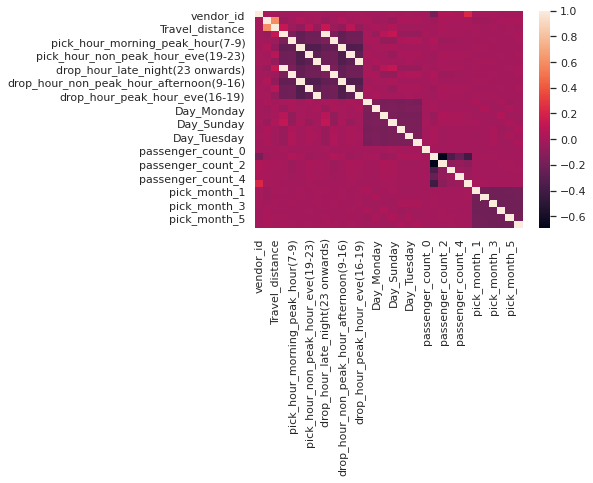

In [73]:
sns.heatmap(trip_df.corr())

In [74]:
scalar= MinMaxScaler(feature_range=(0, 1))
scalar.fit(trip_df)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [75]:
xg_df=trip_df.sample(frac=0.2)

In [76]:
X=xg_df.drop(['trip_duration'],axis=1)
y=xg_df['trip_duration']

In [77]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [78]:
from xgboost.sklearn import XGBRegressor


In [79]:
xgb=XGBRegressor(verbose=0)

In [80]:
xgb.fit(x_train,y_train)


[17:11:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbose=0, verbosity=1)

In [81]:
tr_pred=xgb.predict(x_train)
ts_pred=xgb.predict(x_test)

In [82]:
#TRAIN metrics
MSE_bt  = mean_squared_error((y_train), (tr_pred))
print("MSE :" , MSE_bt)

RMSE_bt = np.sqrt(MSE_bt)
print("RMSE :" ,RMSE_bt)

r2_bt = r2_score((y_train), (tr_pred))
print("R2 :" ,r2_bt)
Adjusted_R2_bt=1-(1-r2_score((y_train), (tr_pred)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2_bt)


MSE : 0.005433250499679019
RMSE : 0.07371058607607878
R2 : 0.6484252648476009
Adjusted R2 :  0.648374366716607


In [83]:
#TEST metrics
MSE_b  = mean_squared_error((y_test), (ts_pred))
print("MSE :" , MSE_b)

RMSE_b = np.sqrt(MSE_b)
print("RMSE :" ,RMSE_b)

r2_b = r2_score((y_test), (ts_pred))
print("R2 :" ,r2_b)
Adjusted_R2_b = 1-(1-r2_score((y_test), (ts_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2_b)


MSE : 0.005485043358204294
RMSE : 0.07406107856495403
R2 : 0.6484836175907521
Adjusted R2 :  0.648279969459509


#Gridsearch cv

In [84]:
from sklearn.model_selection import GridSearchCV


In [86]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [3,5,8]
learning_rate=[0.1,0.3,0.5]

# HYperparameter Grid
param_xgb = {'n_estimators' : [50,80,100],
              'max_depth' : [3,5,8],
              'learning_rate':[0.1,0.3,0.5]}

In [89]:
grid = GridSearchCV(estimator=xgb,param_grid = param_xgb,cv = 5, verbose=2,scoring="r2",n_jobs=2)


In [90]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  9.5min
[Parallel(n_jobs=2)]: Done 135 out of 135 | elapsed: 40.5min finished


[18:06:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbose=0, verbosity=1),
             iid='deprecated', n_jobs=2,
             param_grid={'learning_rate': [0.1, 0.3, 0.5],
                         'max_depth': [3, 5, 8],
                

In [91]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [92]:
gtr_pred=grid.predict(x_train)
gts_pred=grid.predict(x_test)

In [93]:
#TRAIN metrics
MSE_t  = mean_squared_error((y_train), (gtr_pred))
print("MSE :" , MSE_t)

RMSE_t = np.sqrt(MSE_t)
print("RMSE :" ,RMSE_t)

r2_t = r2_score((y_train), (gtr_pred))
print("R2 :" ,r2_t)
Adjusted_R2_t = 1-(1-r2_score((y_train), (gtr_pred)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2_t)

MSE : 0.005270028270042116
RMSE : 0.07259496036256316
R2 : 0.6589870477359416
Adjusted R2 :  0.6589376786539811


In [94]:
#TEST metrics
MSE  = mean_squared_error((y_test), (gts_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (gts_pred))
print("R2 :" ,r2)
Adjusted_R2 = 1-(1-r2_score((y_test), (gts_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2)

MSE : 0.0053707770424156675
RMSE : 0.07328558550230507
R2 : 0.6558065281557472
Adjusted R2 :  0.6556071224926406
